In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from path import Path
import numpy as np

In [4]:
df = pd.read_csv(Path('healthcare-dataset-stroke-data.csv'))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [51]:
#drop id, ever_married, work_type, Residence_type
df_new_stroke = df.drop(df.columns[[0, 5, 6, 7]], axis=1)  # df.columns is zero-based pd.Index 
df_new_stroke

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0


In [33]:
df_framingham = pd.read_csv(Path('framingham.csv'))
df_framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [46]:
#drop heartRate, TenYearCHD, sysBP, diaBP, heartRate, totChol, BPMeds, education, cigsPerDay
df_new = df_framingham.drop(df_framingham.columns[[4, 5, 9, 10, 11, 13, 15]], axis=1)  # df.columns is zero-based pd.Index 
df_new

,male,age,education,currentSmoker,prevalentStroke,prevalentHyp,diabetes,BMI,glucose
0,1,39.0,4.0,0,0,0,0,27.0,77.0
1,0,46.0,2.0,0,0,0,0,29.0,76.0
2,1,48.0,1.0,1,0,0,0,25.0,70.0
3,0,61.0,3.0,1,0,1,0,29.0,103.0
4,0,46.0,3.0,1,0,0,0,23.0,85.0
...,...,...,...,...,...,...,...,...,...
4233,1,50.0,1.0,1,0,1,0,26.0,86.0
4234,1,51.0,3.0,1,0,0,0,20.0,68.0
4235,0,48.0,2.0,1,0,0,0,22.0,86.0
4236,0,44.0,1.0,1,0,0,0,19.0,NaN


In [34]:
#rounded_BMI
df_framingham.BMI = df_framingham.BMI.round()
print (df_framingham)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  \
0                   0             0         0    195.0  106.0   70.0  27.0   
1                   0             0         0    250.0  121.0  

In [35]:
#added significant figures to age
df_framingham["age"] = pd.to_numeric(df_framingham["age"], downcast="float")
print (df_framingham)

      male   age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1  39.0        4.0              0         0.0     0.0   
1        0  46.0        2.0              0         0.0     0.0   
2        1  48.0        1.0              1        20.0     0.0   
3        0  61.0        3.0              1        30.0     0.0   
4        0  46.0        3.0              1        23.0     0.0   
...    ...   ...        ...            ...         ...     ...   
4233     1  50.0        1.0              1         1.0     0.0   
4234     1  51.0        3.0              1        43.0     0.0   
4235     0  48.0        2.0              1        20.0     NaN   
4236     0  44.0        1.0              1        15.0     0.0   
4237     0  52.0        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  \
0                   0             0         0    195.0  106.0   70.0  27.0   
1                   0             0         0    25

In [ ]:
# plt.scatter(df.age, df.avg_glucose_level)
# plt.xlabel('age')
# plt.ylabel('avg_glucose_level')
# plt.show()

In [ ]:
# plt.scatter(df.bmi, df.avg_glucose_level)
# plt.xlabel('bmi')
# plt.ylabel('avg_glucose_level')
# plt.show()

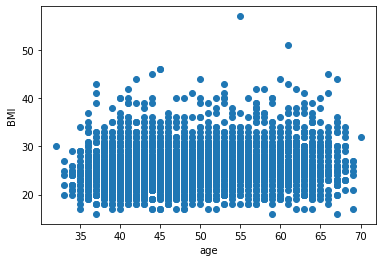

In [39]:
# plt.scatter(df_framingham.age, df_framingham.BMI)
# plt.xlabel('age')
# plt.ylabel('BMI')
# plt.show()

In [ ]:
# plt.scatter(df.age, df.bmi)
# plt.xlabel('age')
# plt.ylabel('bmi')
# plt.show()

In [37]:
# y = df["smoking_status"]
# X = df.drop(columns="smoking_status")

In [7]:
# y = df["Residence_type"]
# X = df.drop(columns="Residence_type")

In [8]:
# y = df["work_type"]
# X = df.drop(columns="work_type")

In [9]:
# y = df["ever_married"]
# X = df.drop(columns="ever_married")

In [10]:
# y = df["gender"]
# X = df.drop(columns="gender")

In [11]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,
#    y,  random_state=1, stratify=y)
# X_train.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.